# [A public data set of spatio-temporal match events in soccer competitions](https://www.nature.com/articles/s41597-019-0247-7)
Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi & Fosca Giannotti

Nature Scientific Data 6, Article number: 236 (2019)

if you use this code or the plots generated from it, please cite/mention the following:

- ```
Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7
```
- ```
Pappalardo, Luca; Massucco, Emanuele (2019): Soccer match event dataset. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4415000.v5
```

## Import libraries

Here we import all the libraries useful to create plots.

In [1]:
%matplotlib inline
from utils import *
from plot_utils import *
from metrics import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

## Import data sets
Here we import the matches, events, players, and competition data sets from the `json` files. Download the following files from the figshare repository, unzip them (when needed) and put them in your data folder:
- `events.zip` (unzip it)
- `matches.zip` (unzip it)
- `players.json`
- `competitions.json`
- `tag2name.csv`
- `eventid2name.csv`

In [2]:
%%time
data_folder = 'data/'
tournaments = ['Italy']
matches, events, players, competitions = load_jsons(data_folder=data_folder, 
                                                    tournaments=tournaments)

CPU times: user 7.47 s, sys: 1.02 s, total: 8.49 s
Wall time: 9.61 s


In [3]:
tags_names_df = pd.read_csv(data_folder + 'tags2name.csv')
event_names_df = pd.read_csv(data_folder + 'eventid2name.csv')
event_names_df = event_names_df.append({'event' : -1 , 'subevent' : -1, 'event_label': 'End of game',
                      'subevent_label': 'End of game'} , ignore_index=True)

Let's inspect the structure of a match

In [4]:
players[0]

{'passportArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'weight': 78,
 'firstName': 'Harun',
 'middleName': '',
 'lastName': 'Tekin',
 'currentTeamId': 4502,
 'birthDate': '1989-06-17',
 'height': 187,
 'role': {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'},
 'birthArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'wyId': 32777,
 'foot': 'right',
 'shortName': 'H. Tekin',
 'currentNationalTeamId': 4687}

In [5]:
competitions[0]

{'name': 'Italian first division',
 'wyId': 524,
 'format': 'Domestic league',
 'area': {'name': 'Italy',
  'id': '380',
  'alpha3code': 'ITA',
  'alpha2code': 'IT'},
 'type': 'club'}

In [6]:
matches['Italy'][0]#['teamsData'].keys()

{'status': 'Played',
 'roundId': 4406278,
 'gameweek': 38,
 'teamsData': {'3162': {'scoreET': 0,
   'coachId': 251025,
   'side': 'home',
   'teamId': 3162,
   'score': 2,
   'scoreP': 0,
   'hasFormation': 1,
   'formation': {'bench': [{'playerId': 4792,
      'ownGoals': '2',
      'redCards': '93',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 20972,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 256479,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 241675,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 260250,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 69417,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 20460,
      'ownGoals':

Let's inspect the strucutre of an event

In [7]:
events['Italy'][0]#100

{'eventId': 8,
 'subEventName': 'Simple pass',
 'tags': [{'id': 1801}],
 'playerId': 8327,
 'positions': [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}],
 'matchId': 2575959,
 'eventName': 'Pass',
 'teamId': 3158,
 'matchPeriod': '1H',
 'eventSec': 2.5305359999999837,
 'subEventId': 85,
 'id': 180423957}

## How are the data collected?
<img src='system_figure.jpg'/>

The process of tagging the soccer events from a match video. (a) Screenshot from the tagging software. An action is tagged by an operator via a special custom keyboard, thus creating a new event on the match timeline. (b) When the event position on the pitch is set, the shot specific input module appears (top). Event related input modules also appear for setting additional attributes of the occurring event (bottom).

## Events description

Statistics of the events data set. 
1. Frequency of events per type. 
2. Distribution of the number of events
in soccer matches. 
3. Events produced by the two teams in the match Lazio vs. Internazionale. The events are plotted on the position of the field where they occurred.

### 1. Frequency of events per type

What is the most frequent event in soccer-logs?

For each event type, we plot how frequent it is in the events data set.

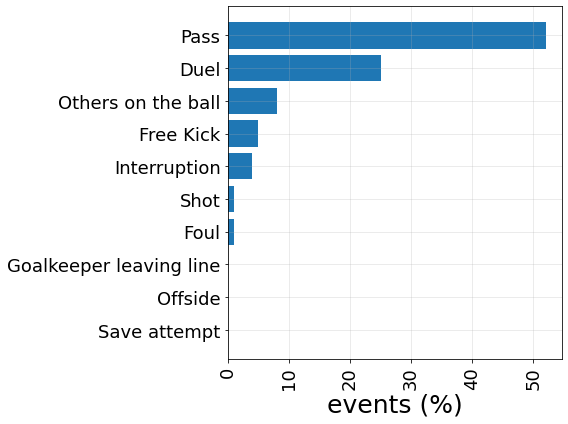

In [8]:
events_list = []
for tournament in tournaments:
    for event in events[tournament]:
        events_list.append(event['eventName'])

count = Counter(events_list)
# express frequency in percentage
counter = {}
for i, n_events in zip(count.keys(), count.values()):
    counter[i] = int(float(n_events)/len(events_list)*100)
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))

#bar plot
fig, ax = plt.subplots(figsize=(8,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90);plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()

### 2. Distribution of the number of events in soccer matches
We compute the number of events in each match. We then plot the distribution of this quantity.

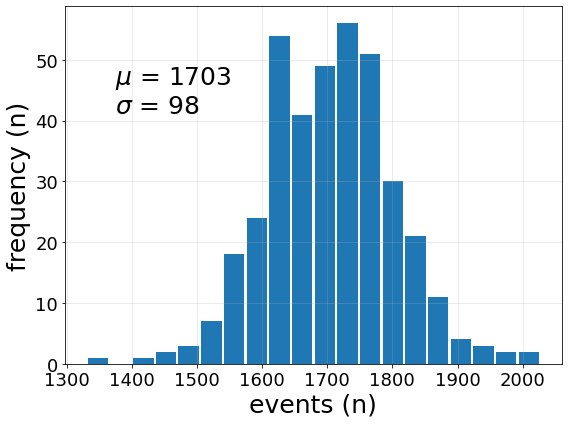

In [9]:
# compute the number of events per match
match2n_events = defaultdict(int)
for tournament in tournaments:
    for event in events[tournament]:
        match_id = event['matchId']
        match2n_events[match_id] += 1

values = list(match2n_events.values())
avg_n_events = np.mean(values)
std_n_events = np.std(values)

fig, ax = plt.subplots(figsize=(8,6))
plt.hist(match2n_events.values(), rwidth=0.9, bins=20)
plt.grid(alpha=0.3)
plt.yticks(fontsize=18)
plt.xlabel('events (n)', fontsize=25)
plt.ylabel('frequency (n)', fontsize=25)
plt.xticks(fontsize=18)
plt.text(0.1, 0.7, 
         '$\mu$ = %i\n$\sigma$ = %i'%(avg_n_events, std_n_events), 
         fontsize=25, transform=ax.transAxes)
fig.tight_layout()
plt.show()

### 3. Events produced during a match
We take an examplar match and plot on a soccer field all the events of the two teams. Each event is plotted on the position of the field where it has occurred.

In [10]:
match_id = 2576335 # a single match in Italy
match_events = []
for event in events[tournaments[0]]:
    if event['matchId'] == match_id:
        match_events.append(event)
        
match_label = ''
for match in matches['Italy']:
    if match['wyId'] == match_id:
        match_label = match['label']
            
match_df = pd.DataFrame(match_events)
match_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3344,"[{'y': 50, 'x': 49}, {'y': 58, 'x': 38}]",2576335,Pass,3161,1H,2.417590,85,253668302
1,8,Simple pass,[{'id': 1801}],116349,"[{'y': 58, 'x': 38}, {'y': 91, 'x': 37}]",2576335,Pass,3161,1H,3.904412,85,253668303
2,8,Simple pass,[{'id': 1801}],135903,"[{'y': 91, 'x': 37}, {'y': 72, 'x': 34}]",2576335,Pass,3161,1H,6.484211,85,253668304
3,8,Simple pass,[{'id': 1801}],138408,"[{'y': 72, 'x': 34}, {'y': 14, 'x': 36}]",2576335,Pass,3161,1H,10.043835,85,253668306
4,8,Simple pass,[{'id': 1801}],21094,"[{'y': 14, 'x': 36}, {'y': 39, 'x': 30}]",2576335,Pass,3161,1H,14.032070,85,253668308


In [11]:
match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]
match_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
0,8,Simple pass,[{'id': 1801}],3344,"[{'y': 50, 'x': 49}, {'y': 58, 'x': 38}]",2576335,Pass,3161,1H,2.417590,85,253668302,49,50
1,8,Simple pass,[{'id': 1801}],116349,"[{'y': 58, 'x': 38}, {'y': 91, 'x': 37}]",2576335,Pass,3161,1H,3.904412,85,253668303,38,58
2,8,Simple pass,[{'id': 1801}],135903,"[{'y': 91, 'x': 37}, {'y': 72, 'x': 34}]",2576335,Pass,3161,1H,6.484211,85,253668304,37,91
3,8,Simple pass,[{'id': 1801}],138408,"[{'y': 72, 'x': 34}, {'y': 14, 'x': 36}]",2576335,Pass,3161,1H,10.043835,85,253668306,34,72
4,8,Simple pass,[{'id': 1801}],21094,"[{'y': 14, 'x': 36}, {'y': 39, 'x': 30}]",2576335,Pass,3161,1H,14.032070,85,253668308,36,14


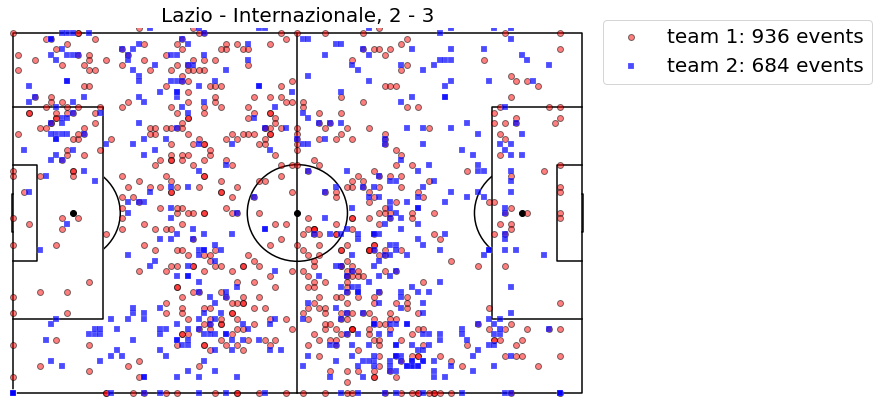

In [12]:
team_1, team_2 = np.unique(match_df['teamId'])
df_team_1 = match_df[match_df['teamId'] == team_1]
df_team_2 = match_df[match_df['teamId'] == team_2]

f = draw_pitch("white", "black", "h", "full")
plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='team 1: %s events' %len(df_team_1))
plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
            alpha=0.7, label='team 2: %s events' %len(df_team_2))
plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
plt.title(match_label, fontsize=20)
plt.show()

In [13]:
def plot_events(match_id=2576335, team_id='both', event_name='all'):
    match_events = []
    for event in events[tournaments[0]]:
        if event['matchId'] == match_id:
            if team_id == 'both' or event['teamId'] == team_id:
                if event_name == 'all' or event['eventName'] == event_name:
                    match_events.append(event)
    match_label = ''
    for match in matches[tournament]:
        if match['wyId'] == match_id:
            match_label = match['label']

    match_df = pd.DataFrame(match_events)
    match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
    match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]
    
    if team_id == 'both':
        team_1, team_2 = np.unique(match_df['teamId'])
        df_team_1 = match_df[match_df['teamId'] == team_1]
        df_team_2 = match_df[match_df['teamId'] == team_2]
    else:
        df_team = match_df[match_df['teamId'] == team_id]
    
    f = draw_pitch("white", "black", "h", "full")
    if team_id == 'both':
        plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='team 1: %s %s' %(len(df_team_1), 'events' if event_name=='all' else event_name))
        plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
                    alpha=0.7, label='team 2: %s %s' %(len(df_team_2), 'events' if event_name=='all' else event_name))
        plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    else:
        plt.scatter(df_team['x_start'], df_team['y_start'], 
                    c='red', edgecolors="k", zorder=12, alpha=0.5,
                   label='team: %s %s' %(len(df_team), 'events' if event_name=='all' else event_name))
    
    plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    plt.show()
 

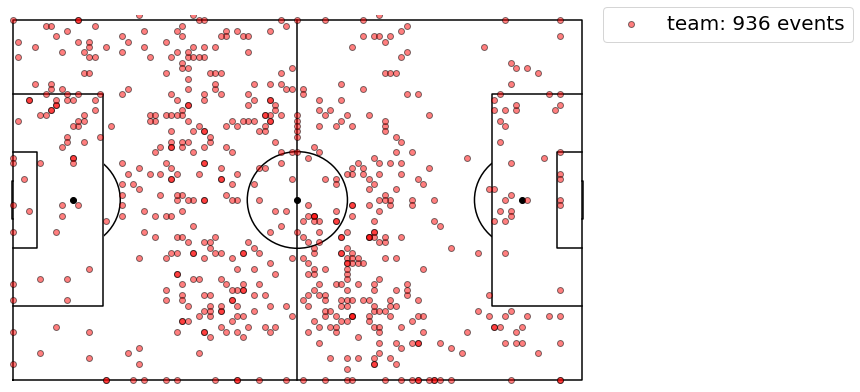

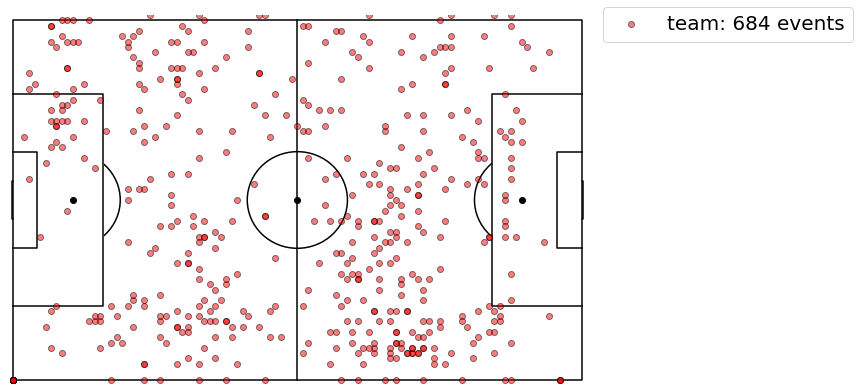

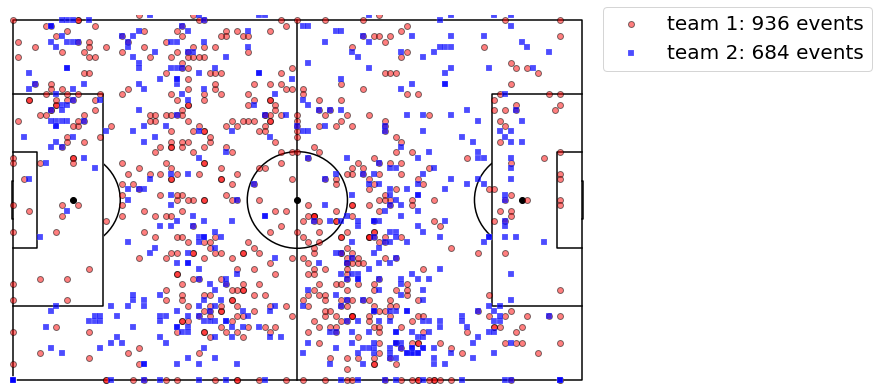

In [14]:
match_id, team1, team2 = 2576335, 3161, 3162
plot_events(team_id=3161)
plot_events(team_id=3162)
plot_events(team_id='both')

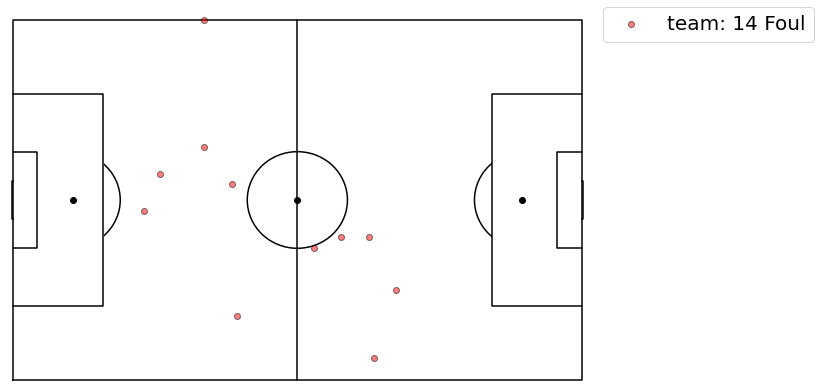

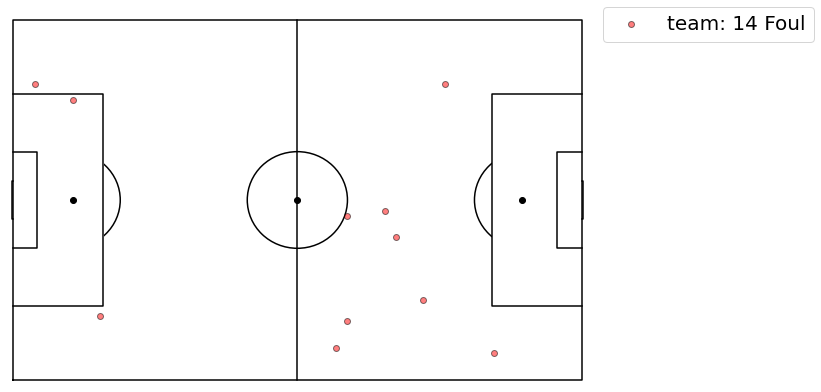

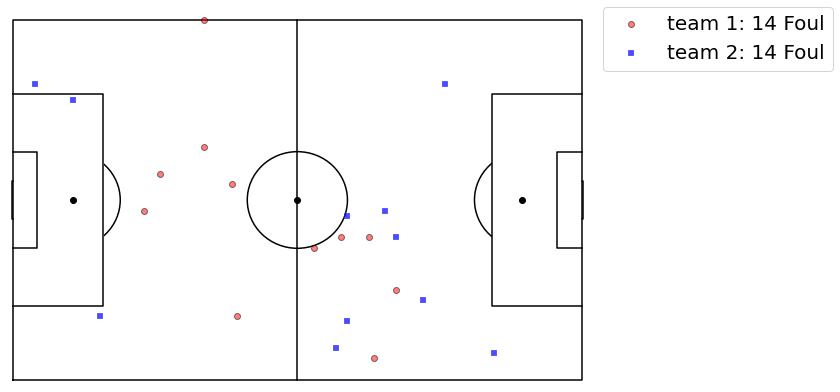

In [15]:
match_id, team1, team2, event_name = 2576335, 3161, 3162, 'Foul'
plot_events(team_id=3161, event_name=event_name)
plot_events(team_id=3162, event_name=event_name)
plot_events(team_id='both', event_name=event_name)

In [16]:
def visualize_events(match_id=2576335, team_id='both', event_name='all'):
    """
    Visualize all the events of a match on the soccer pitch.
    
    Parameters
    ----------
    a_match: dict
        a dictionary containing the information of the match
        
    a_match_events: list
        a list of event dictionaries
    """
    
    match_events = []
    for event in events[tournaments[0]]:
        if event['matchId'] == match_id:
            if team_id == 'both' or event['teamId'] == team_id:
                if event_name == 'all' or event['eventName'] == event_name:
                    match_events.append(event)
    selected_match = ''
    for match in matches[tournament]:
        if match['wyId'] == match_id:
            selected_match = match
    
    team1, team2 = selected_match['teamsData'].keys()

    # Create and style traces
    trace1 = go.Scatter(
        x = [event['positions'][0]['x'] for event in match_events if str(event['teamId']) == team1],
        y = [event['positions'][0]['y'] for event in match_events if str(event['teamId']) == team1],
        text = ['%s by player %s' %(event['eventName'], event['playerId']) for event in match_events if str(event['teamId']) == team1],
        mode = 'markers',
        name = team1,
        marker = dict(
            size = 8,
            color = 'red',
        )
    )

    trace2 = go.Scatter(
        x = [event['positions'][0]['x'] for event in match_events if str(event['teamId']) == team2],
        y = [event['positions'][0]['y'] for event in match_events if str(event['teamId']) == team2],
        text = ['%s by player %s' %(event['eventName'], event['playerId']) for event in match_events if str(event['teamId']) == team2],
        mode = 'markers',
        name = team2,
        marker = dict(
            size = 8,
            color = 'blue',
            symbol='square'
        )
    )

    fig = dict(data=[trace1, trace2], layout=pitch_layout)
    fig['data'][0]['name'] = 'team1'
    fig['data'][1]['name'] = 'team2'
    iplot(fig)

In [17]:
visualize_events(event_name='Foul')

## Figure 3. Events produced by the two teams 

Distribution of positions per event type. Kernel density plots showing the distribution of the events’ positions during match. The darker is the green, the higher is the number of events in a specific field zone.

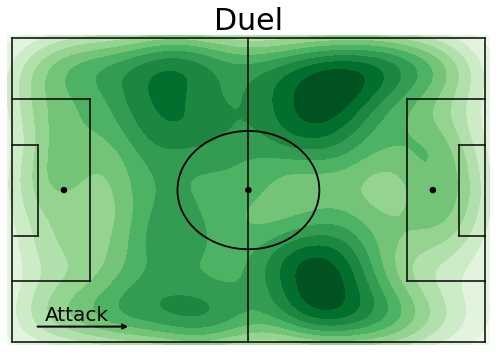

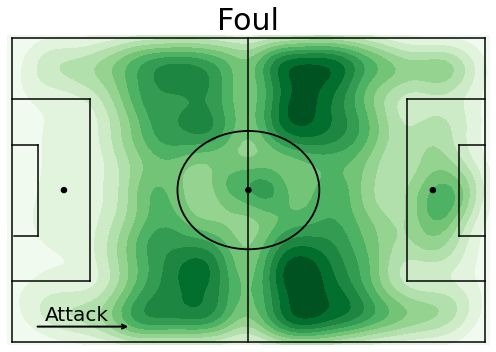

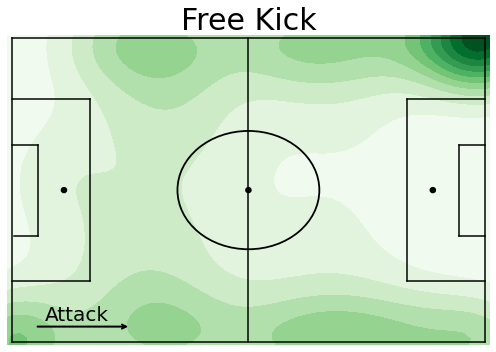

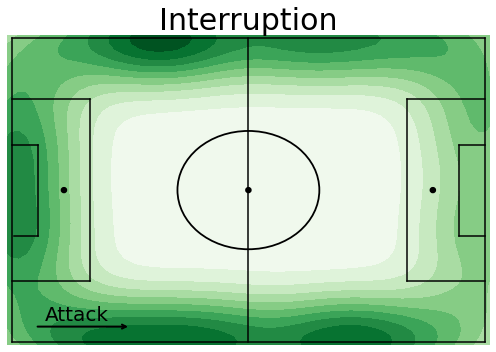

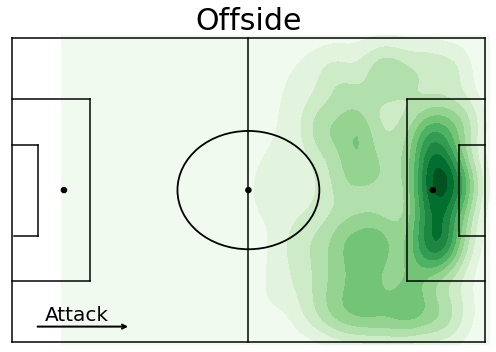

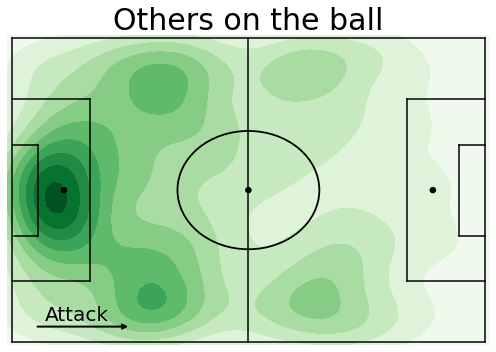

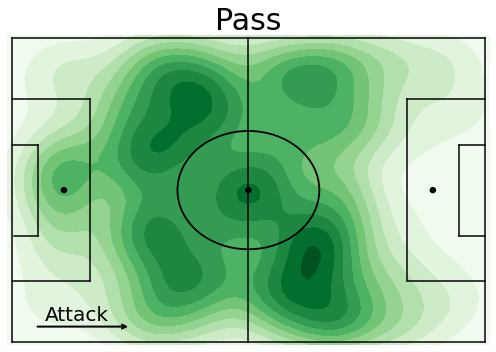

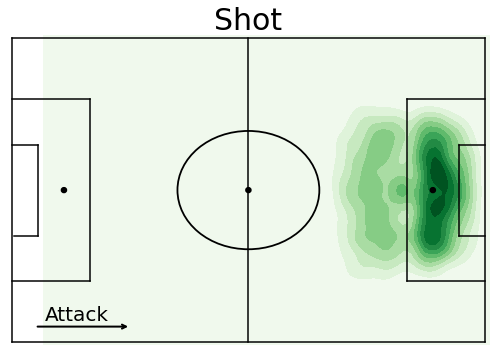

In [18]:
plot_kde_events_on_field(tournaments, events, sample_size=1000)

## Figure 4. In-match evolution of the number of events

In-match evolution of the number of events. Number of events (e.g., goals on the top plot, yellow cards
in the middle plot and the red cards in the bottom plot) that occur in all the matches in the data set, with time
windows of 5 minutes.

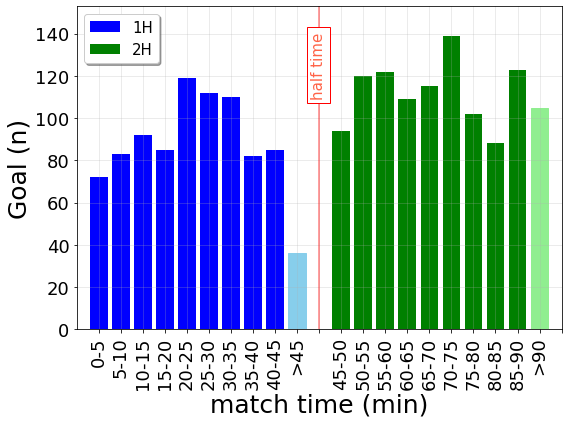

In [19]:
in_match_evolution(tournaments, events, event_name = 'Goal', event_tag = 101)

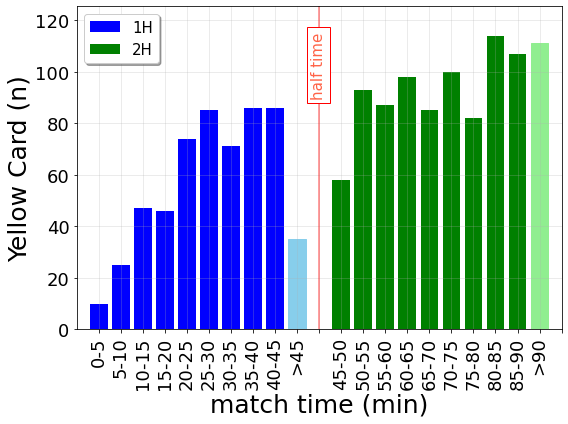

In [20]:
in_match_evolution(tournaments, events, event_name='Yellow Card', event_tag=1702)

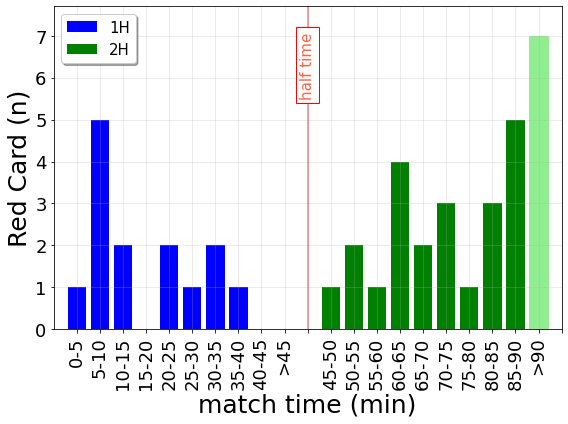

In [21]:
in_match_evolution(tournaments, events, event_name='Red Card', event_tag=1701)

## Figure 5. Invasion index and acceleration index for a game in the match data set

Invasion index and acceleration index for a game in the match data set. Bold lines represent the rolling
mean of, respectively, invasion index (a) and acceleration index (b), while thin lines represent the individual
values computed for each possession phase of each team. Purple vertical lines refer to the two goal scored by
Fiorentina during the match, while the red vertical line indicates the half time of the match.

In [22]:
match_id = 2576263
match_events = []
for event in events[tournaments[0]]:
    if event['matchId'] == match_id:
        match_events.append(event)
            
match_df = pd.DataFrame(match_events)
match_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25541,"[{'y': 49, 'x': 49}, {'y': 57, 'x': 33}]",2576263,Pass,3176,1H,0.978282,85,240827282
1,8,Simple pass,[{'id': 1801}],22313,"[{'y': 57, 'x': 33}, {'y': 58, 'x': 28}]",2576263,Pass,3176,1H,2.216092,85,240827284
2,8,High pass,[{'id': 1801}],86328,"[{'y': 58, 'x': 28}, {'y': 17, 'x': 71}]",2576263,Pass,3176,1H,3.354140,83,240827285
3,1,Air duel,"[{'id': 702}, {'id': 1801}]",92966,"[{'y': 83, 'x': 29}, {'y': 100, 'x': 22}]",2576263,Duel,3158,1H,6.403429,10,240827259
4,1,Air duel,"[{'id': 702}, {'id': 1801}]",26000,"[{'y': 17, 'x': 71}, {'y': 0, 'x': 78}]",2576263,Duel,3176,1H,6.556385,10,240827288


In [23]:
match_label = ''
for match in matches['Italy']:
    if match['wyId'] == match_id:
        match_label = match['label']
match_label

'Roma - Fiorentina, 0 - 2'

In [24]:
list_invasion, list_acceleration = get_invasion_index(tournaments, events, 
                                                      match_id, lst=True)

788


In [25]:
list_invasion

defaultdict(list,
            {3176: [(0.9782819999999788, 0.5),
              (6.5563849999999775, 0.01),
              (18.423058000000026, 0.0),
              (28.68630300000001, 0.01),
              (46.12664699999999, 0.01),
              (56.995835, 0.02),
              (59.05583899999999, 0.5),
              (81.617392, 0.5),
              (97.54853200000002, 0.01),
              (109.12090999999998, 0.5),
              (140.24134099999998, 0.0),
              (145.02975099999998, 0.5),
              (199.964782, 0.5),
              (201.089207, 0.5),
              (222.53600100000006, 0.02),
              (231.043409, 0.01),
              (259.36736199999996, 0.5),
              (282.14650300000005, 0.5),
              (316.15632100000005, 0.01),
              (374.209297, 0.01),
              (375.854476, 1.0),
              (434.25516300000004, 0.0),
              (465.517918, 0.0),
              (499.988106, 0.01),
              (553.249251, 0.02),
              (584.912208,

INVASION INDEX
AS Roma 0.22676844783715014 0.31039555051165213
ACF Fiorentina 0.2682233502538071 0.33064805034029204

ACCELERATION INDEX
AS Roma 0.059315382846643484 0.16648422344162855
ACF Fiorentina 0.07435603198568091 0.1476416427481915


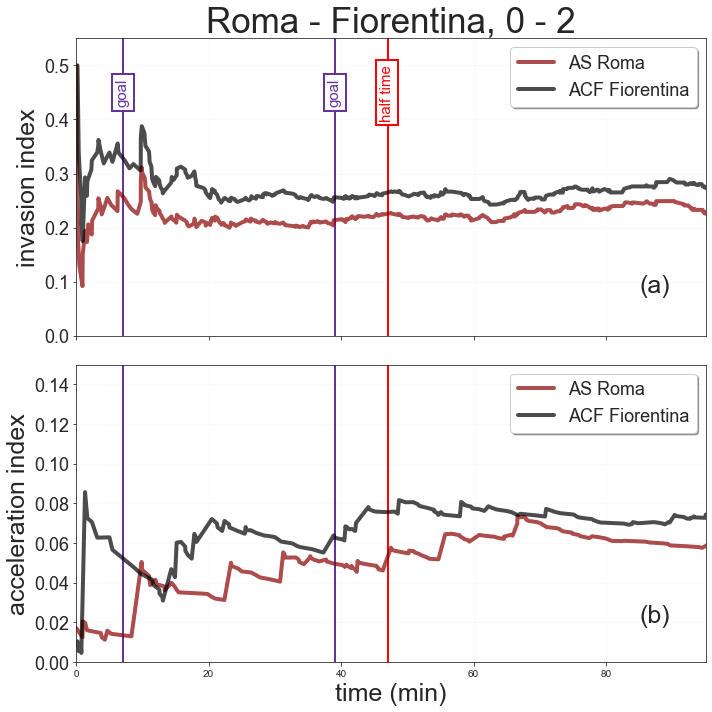

In [26]:
sns.set_style('ticks')

fig, ax = plt.subplots(2,1,figsize=(10,10),sharex=True)

print ('INVASION INDEX')
for i,c,label in zip(list(list_invasion),['darkred','k'],['AS Roma','ACF Fiorentina']):
    df_invasion = pd.DataFrame(list_invasion[i],columns=['time','invasion'])
    df_invasion['time'] = [x/60. for x in df_invasion.time]
    print (label, df_invasion['invasion'].mean(), df_invasion['invasion'].std())
    #ax[0].plot(df_invasion.set_index('time'),alpha=0.2,c=c)
    ax[0].plot(df_invasion.set_index('time').rolling(220, min_periods=1).mean(),c=c,alpha=0.7,lw=4,label=label)
ax[0].legend(loc=1,fontsize=18,frameon=True,shadow=True)
ax[0].grid(alpha=0.1)
ax[0].set_ylabel('invasion index',fontsize=25)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].text(45.8,0.45,'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r',lw=2),
         verticalalignment='center',horizontalalignment='left',fontsize=15,color='r')
ax[0].vlines(47,-1,2,colors='r',lw=2)
ax[0].text(6,0.45,'goal',rotation=90,bbox=dict(facecolor='w',edgecolor='rebeccapurple',lw=2),
         verticalalignment='center',horizontalalignment='left',fontsize=15,color='rebeccapurple')
ax[0].vlines(7,-1,2,colors='rebeccapurple',lw=2)
ax[0].text(38,0.45,'goal',rotation=90,bbox=dict(facecolor='w',edgecolor='rebeccapurple',lw=2),
         verticalalignment='center',horizontalalignment='left',fontsize=15,color='rebeccapurple')
ax[0].vlines(39,-1,2,colors='rebeccapurple',lw=2)
ax[0].text(85,0.08,'(a)',fontsize=25)
ax[0].set_ylim(0,0.55)
ax[0].set_title(match_label,fontsize=35)
print ('')

print ('ACCELERATION INDEX')
for i,c,label in zip(list(list_acceleration),['darkred','k'],['AS Roma','ACF Fiorentina']):
    df_acceleration = pd.DataFrame(list_acceleration[i],columns=['time','acceleration'])
    df_acceleration['time'] = [x/60. for x in df_acceleration.time]
    print (label, df_acceleration['acceleration'].mean(), df_acceleration['acceleration'].std())
    #ax[1].plot(df_acceleration.set_index('time'),alpha=0.2,c=c)
    ax[1].plot(df_acceleration.set_index('time').rolling(220, min_periods=1).mean(),c=c,alpha=0.7,lw=4,label=label)
ax[1].legend(fontsize=18,frameon=True,shadow=True,loc=1)
ax[1].grid(alpha=0.1)
ax[1].set_ylabel('acceleration index', fontsize=25)
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].text(85,0.02,'(b)',fontsize=25)
ax[1].vlines(47,-1,2,colors='r',lw=2)
plt.xlabel('time (min)',fontsize=25)
from matplotlib.ticker import FormatStrFormatter
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xlim(0,95)
# ax[1].text(6,0.45,'goal',rotation=90,bbox=dict(facecolor='w',edgecolor='rebeccapurple',lw=2),
#          verticalalignment='center',horizontalalignment='left',fontsize=15,color='rebeccapurple')
ax[1].vlines(7,-1,2,colors='rebeccapurple',lw=2)
# ax[1].text(38,0.45,'goal',rotation=90,bbox=dict(facecolor='w',edgecolor='rebeccapurple',lw=2),
#          verticalalignment='center',horizontalalignment='left',fontsize=15,color='rebeccapurple')
ax[1].vlines(39,-1,2,colors='rebeccapurple',lw=2)
plt.ylim(0,0.15)
fig.tight_layout()

plt.show()

## Figure 6. player passing networks

Representation of the player passing networks of the match Napoli-Juventus. Nodes represent players, edges represent passes between players. The size of the nodes reflects the number of ingoing and outgoing passes (i.e. node’s degree), while the size of the edges is proportional to the number of passes between the players.

The .gexf file extracted from this block could be used to create a pass network by using a Graph Viz Platform.

In [30]:
match_Id = 2576105
for nation in tournaments:
    for match in matches[nation]:
        if match['wyId'] == match_Id:
            print(match['label'])

Napoli - Juventus, 0 - 1


In [31]:
passing_network(match_Id = 2576105)

NameError: name 'nations' is not defined

## Figure 7. Distribution of flow centrality and PlayeRank score for three top players.

Distribution of flow centrality and PlayeRank score for three top players. 

- (a) Distribution of the flow centrality of L. Messi (red line), C. Ronaldo (blue line) e M. Salah (black line) during the soccer season 2017/2018. 
- (b) Performance quality calculated as the PlayeRank score of L. Messi (red line), C. Ronaldo (blue line), and M. Salah (black line).

### Distribution of the flow centrality

In [28]:
Messi_flow_centrality = flow_centrality_player(player_wyId = 3359)

In [29]:
Ronaldo_flow_centrality = flow_centrality_player(player_wyId = 3322)

In [30]:
Salah_flow_centrality = flow_centrality_player(player_wyId = 120353)

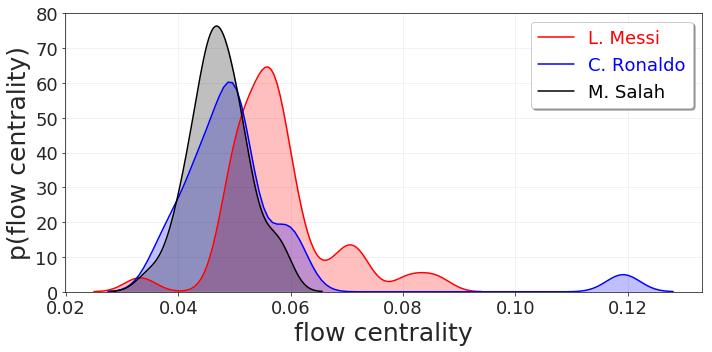

In [31]:
sns.set_style('ticks')

f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(pd.DataFrame(Messi_flow_centrality,columns=['matchId','flow centrality'])['flow centrality'], shade=True, color="r")
sns.kdeplot(pd.DataFrame(Ronaldo_flow_centrality,columns=['matchId','flow centrality'])['flow centrality'], shade=True, color="b")
sns.kdeplot(pd.DataFrame(Salah_flow_centrality,columns=['matchId','flow centrality'])['flow centrality'], shade=True, color="k")
plt.grid(alpha=0.3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('flow centrality', fontsize=25)
plt.ylabel('p(flow centrality)', fontsize=25)
lab = ax.legend(['L. Messi','C. Ronaldo','M. Salah'],loc=1,fontsize=18,frameon=True,shadow=True)
for color,text in zip(['r','b','k'],lab.get_texts()):
    text.set_color(color)
f.tight_layout()
plt.show()

### PlayeRank

In [32]:
df = pd.read_json('cr7-messi-salah.json')

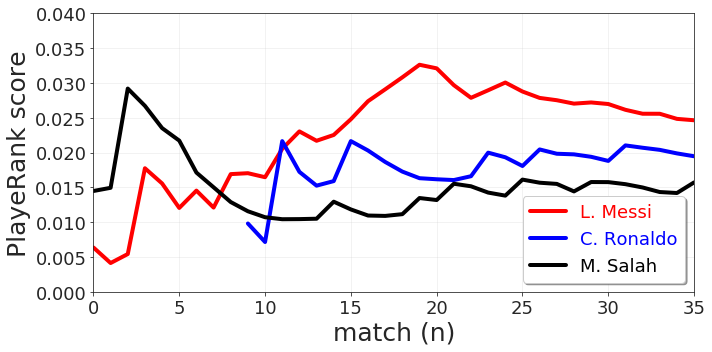

In [33]:
f,ax = plt.subplots(figsize=(10,5),sharex=True)
for player,name,color in zip([u'3359,L. Messi', u'3322,Cristiano Ronaldo', u'120353,Mohamed Salah'],['L. Messi', 'C. Ronaldo', 'M. Salah'],['r','b','k']):
    if player == '3322,Cristiano Ronaldo':
        df_C = df[df.player==player].sort_values('match').reset_index()['playerankScore'].rolling(30, min_periods=1).mean()#.plot(label=player)
        dc = pd.DataFrame([[np.nan],[np.nan],[np.nan],[np.nan],[np.nan],[np.nan],[np.nan],[np.nan],[np.nan]])
        pd.concat([dc,df_C]).reset_index()[0].plot(label=name,lw=4,c=color)
    else:
        df[df.player==player].sort_values('match').reset_index()['playerankScore'].rolling(50, min_periods=1).mean().plot(label=name,lw=4,c=color)
        
plt.grid(alpha=0.3)
lab = ax.legend(['L. Messi','C. Ronaldo','M. Salah'],loc=4,fontsize=18,frameon=True,shadow=True)
for color,text in zip(['r','b','k'],lab.get_texts()):
    text.set_color(color)
plt.ylim(0,0.04)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('PlayeRank score', fontsize=25)
plt.xlabel('match (n)', fontsize=25)
f.tight_layout()
plt.show()
